In [1]:
%matplotlib inline
from PIL import Image
from PIL import ImageSequence
import numpy as np
import paramiko
import struct
import matplotlib.pyplot as plt
import math
import imageio

ImportError: DLL load failed: 找不到指定的程序。

In [2]:
file_name=("eye.jpg")
img = Image.open(file_name)

In [3]:
frame=ImageSequence.Iterator(img);
a=np.array(img.getchannel(0))

In [4]:
h=a.shape[0]
w=a.shape[1]
file=open('image','wb')
for c in range(3):
    a=np.array(img.getchannel(2-c))#BGR
    for i in range(h):
        for j in range(w):
            file.write(a[i][j])
file.close()

In [20]:
tran=paramiko.Transport(('192.168.1.107',22))
tran.connect(username='root',password='root')

In [21]:
imagepath='image'
parameterpath='parameter.txt'
exepath='eye.elf'
remote_prefix='/home/root/'
# remote_imagepath='/home/root/image'
# remote_parameterpath='/home/root/parameter.txt'
# remote_exepath='/home/root/eye.elf'
sftp=paramiko.SFTPClient.from_transport(tran)
sftp.put(imagepath,remote_prefix+imagepath)
sftp.put(parameterpath,remote_prefix+parameterpath)
sftp.put(exepath,remote_prefix+exepath)

<SFTPAttributes: [ size=96692 uid=0 gid=0 mode=0o100644 atime=1594222689 mtime=1594222689 ]>

In [22]:
ssh=paramiko.SSHClient()

In [23]:
ssh._transport=tran
ssh.exec_command('cd /home/root/')
ssh.exec_command('chmod u+x eye.elf');
stdin,stdout,stderr=ssh.exec_command('./eye.elf');
print(stdout.read().decode('utf-8'))

In [26]:
sftp.put(exepath,remote_prefix+exepath)
ssh.exec_command('chmod u+x eye.elf');

In [24]:
resultpath='result.txt'
sftp.get(remote_prefix+resultpath,resultpath)

FileNotFoundError: [Errno 2] No such file

In [25]:
f=open('result.txt','r');
data=f.read();
f.close();
data.strip('\n');
parameter=data.split(' ');
image_h=h
image_w=w
png=np.empty(shape=(image_h,image_w),dtype=np.float32)
for i in range(image_h):
    for j in range(image_w):
        png[i][j]=1/(1+math.exp(-float(parameter[i*image_w+j])));

imageio.imwrite("result.png",png)


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


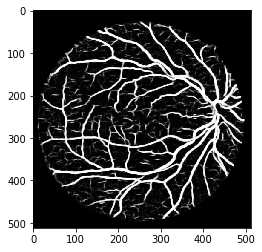

In [26]:
plt.imshow(png,cmap ='gray')

In [ ]:
tran.close()
ssh.close();